<a href="https://colab.research.google.com/github/Bhryee/Exploratory_Data_Analysis/blob/main/Btk_araba_fiyat_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [78]:
df = pd.read_excel("merc.xlsx")

In [79]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [81]:
#df.loc[df.duplicated()]

In [82]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<ipython-input-83-ecc7233ccf4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


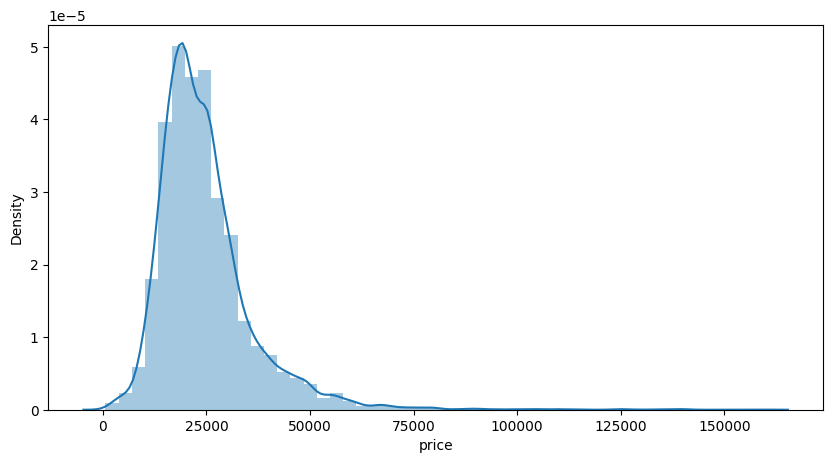

In [83]:
#dağılım grafiğini çizelim
plt.figure(figsize = (10,5))
sns.distplot(df["price"])
plt.show()

Price dağılım grafiği sağa çarpıktır ve aykırı değerler vardır. Pahalı arabalardan dolayı doğru çıkarımlar elde edemeyebiliriz.

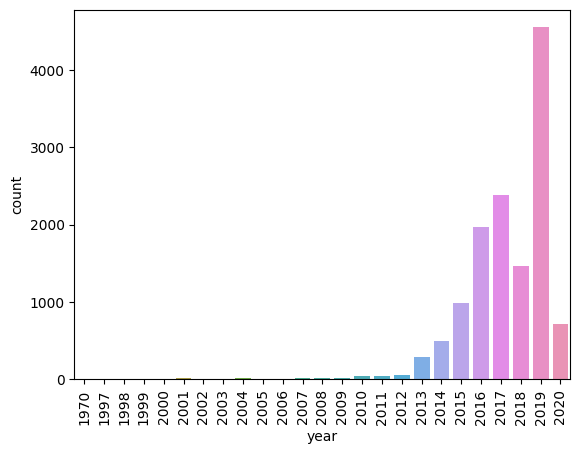

In [84]:
sns.countplot(data = df, x = "year")
plt.xticks(rotation = 90)
plt.show()

In [85]:
corr = df.corr()
corr

<ipython-input-85-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [86]:
#Belli bir veriye göre korelasyonu dizmek
df.corr()["price"].sort_values()

<ipython-input-86-0ce497c392b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

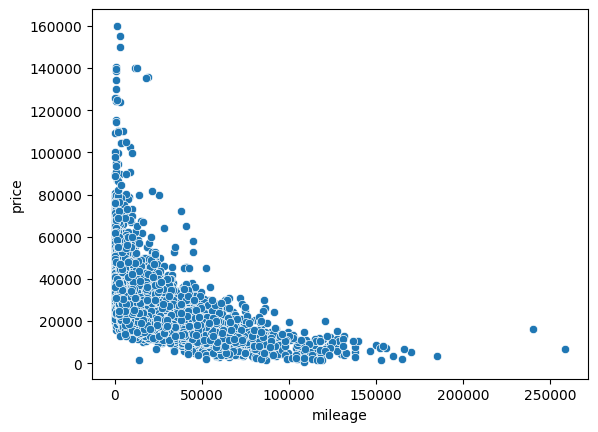

In [87]:
sns.scatterplot(x = "mileage", y = "price", data = df)

<Axes: xlabel='year', ylabel='price'>

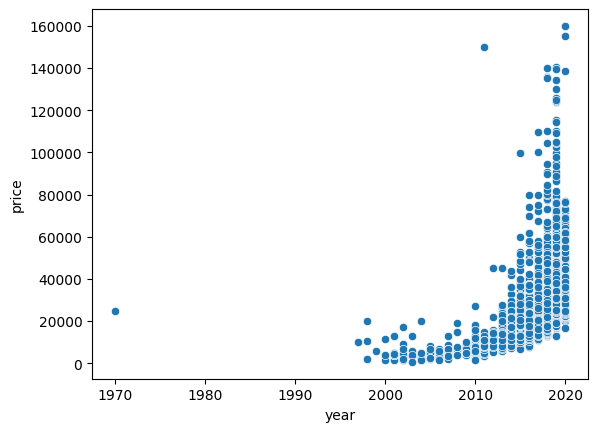

In [88]:
sns.scatterplot(x = "year", y = "price", data = df)

In [89]:
#En yüksek fiyatlı ilk 20 araba
df.sort_values("price", ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


Bir verinin %1'ini silip %99'unu alırsak büyük ihtimalle verinin yansıttığı genel tablo (modelimiz) bozulmaz.

In [90]:
len(df)

13119

In [91]:
len(df) * 0.01

131.19

13119 veriye sahip veri setinden en pahalı fiyata sahip 131 araba verisini silebiliriz.

In [92]:
#iloc = indekse göre yerini bul
df_99 = df.sort_values("price", ascending = False).iloc[131:] #131'den başla
df_99.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [93]:
df_99.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2


<ipython-input-94-0a8e643bb920>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_99["price"])


<Axes: xlabel='price', ylabel='Density'>

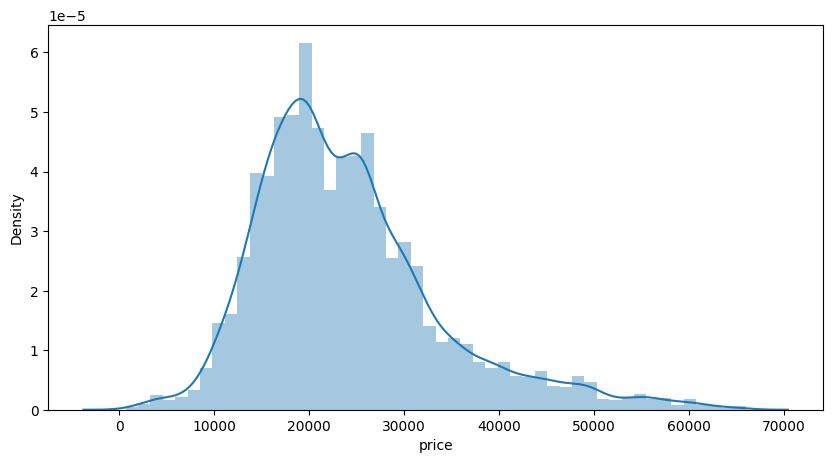

In [94]:
plt.figure(figsize = (10,5))
sns.distplot(df_99["price"])

In [95]:
#yıllara göre gruplayıp fiyatların ortalamasını almak
df.groupby("year").mean()["price"]

<ipython-input-95-1fc0ff758a06>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [96]:
df_99.groupby("year").mean()["price"]

<ipython-input-96-e86b5be0cda1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_99.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

1970 yılındaki araba fiyatının eski yıllara ait araba fiyatlarına göre yüksek olması modelimizi bozabilir. 1970 yılındaki arabanın özel bir durumu olabilir.

In [97]:
df_99 = df_99[df_99.year != 1970]

In [98]:
df_99.groupby("year").mean()["price"]

<ipython-input-98-e86b5be0cda1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_99.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [99]:
#axis = 1 kolonu(sütun) tamamen düşür
df_99 = df_99.drop("transmission", axis = 1)

In [100]:
X = df_99.drop("price", axis = 1).values #numpy array'e çevirdik
y = df_99["price"].values #numpy array'e çevirdik

#Verinin %1'i ve 1970 yılı silinmiş haliyle model oluşturmak

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size = 0.3,
                                                     random_state = 10)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [105]:
#model oluşturmak
from tensorflow.keras.models import Sequential

#katman oluşturmak
from tensorflow.keras.layers import Dense

In [106]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [107]:
#validation_data :doğrulayıcı, test ile train'i karşılaştırmayı sağlar
#batch_size modele tüm verileri bir anda vermek modeli çökertebilir
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 250,
          epochs = 300)

Epoch 1/300
37/37 [==============================] - 4s 24ms/step - loss: 672145344.0000 - val_loss: 688096256.0000
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 672113792.0000 - val_loss: 688052480.0000
Epoch 3/300
37/37 [==============================] - 0s 9ms/step - loss: 672042368.0000 - val_loss: 687932992.0000
Epoch 4/300
37/37 [==============================] - 0s 8ms/step - loss: 671845376.0000 - val_loss: 687607424.0000
Epoch 5/300
37/37 [==============================] - 0s 8ms/step - loss: 671322688.0000 - val_loss: 686767232.0000
Epoch 6/300
37/37 [==============================] - 0s 10ms/step - loss: 670051648.0000 - val_loss: 684830208.0000
Epoch 7/300
37/37 [==============================] - 0s 10ms/step - loss: 667290112.0000 - val_loss: 680840192.0000
Epoch 8/300
37/37 [==============================] - 0s 11ms/step - loss: 661914560.0000 - val_loss: 673411968.0000
Epoch 9/300
37/37 [==============================] - 1s 17ms/step - loss: 65

In [108]:
kayıp_veri = pd.DataFrame(model.history.history)
kayıp_veri.head()

,loss,val_loss
0,672145344.0,688096256.0
1,672113792.0,688052480.0
2,672042368.0,687932992.0
3,671845376.0,687607424.0
4,671322688.0,686767232.0


<Axes: >

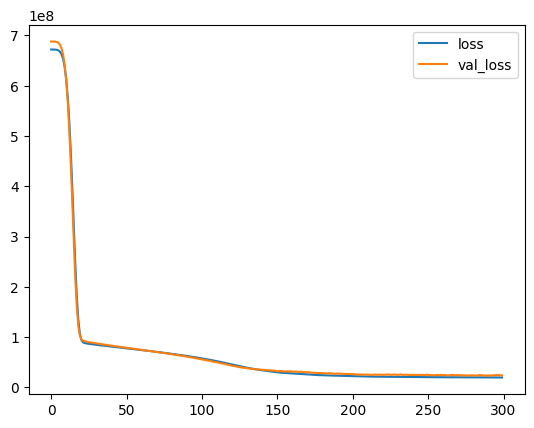

In [109]:
kayıp_veri.plot()

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [111]:
tahmin = model.predict(X_test)

122/122 [==============================] - 0s 3ms/step


In [112]:
mean_squared_error(y_test, tahmin)

23471873.264006887

In [113]:
mean_absolute_error(y_test, tahmin)

3423.925163161366

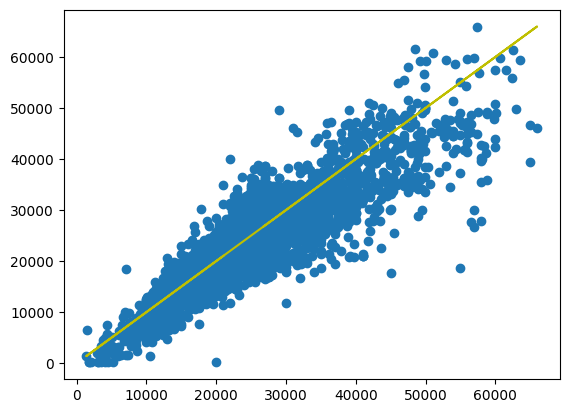

In [118]:
plt.scatter(y_test, tahmin)
plt.plot(y_test, y_test, "y-")

In [129]:
df_99.iloc[3]

year           2019.0
price         65000.0
mileage        3398.0
tax             145.0
mpg              27.2
engineSize        4.0
Name: 4727, dtype: float64

In [136]:
araba = df_99.drop("price", axis = 1).iloc[3]

In [137]:
araba = scaler.transform(araba.values.reshape(-1, 5))

In [138]:
model.predict(araba)

1/1 [==============================] - 0s 23ms/step


array([[58169.133]], dtype=float32)

#Verinin silinmemiş haliyle model oluşturmak

In [159]:
df0 = df.drop("transmission", axis = 1)

In [160]:
XX = df0.drop("price", axis = 1).values #numpy array'e çevirdik
yy = df0["price"].values #numpy array'e çevirdik

In [161]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy,
                                                     test_size = 0.3,
                                                     random_state = 10)

In [162]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [163]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [164]:
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 250,
          epochs = 300)

Epoch 1/300
37/37 [==============================] - 2s 8ms/step - loss: 741846592.0000 - val_loss: 769876672.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 741835264.0000 - val_loss: 769856384.0000
Epoch 3/300
37/37 [==============================] - 0s 6ms/step - loss: 741792000.0000 - val_loss: 769778176.0000
Epoch 4/300
37/37 [==============================] - 0s 5ms/step - loss: 741632896.0000 - val_loss: 769499840.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 741112448.0000 - val_loss: 768640128.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 739655168.0000 - val_loss: 766407168.0000
Epoch 7/300
37/37 [==============================] - 0s 5ms/step - loss: 736203584.0000 - val_loss: 761451456.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 729061952.0000 - val_loss: 751722944.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 7156851

In [152]:
kayıp_veri = pd.DataFrame(model.history.history)
kayıp_veri.head()

,loss,val_loss
0,741843200.0,769870144.0
1,741823168.0,769836992.0
2,741755968.0,769715584.0
3,741515712.0,769300224.0
4,740777280.0,768129600.0


<Axes: >

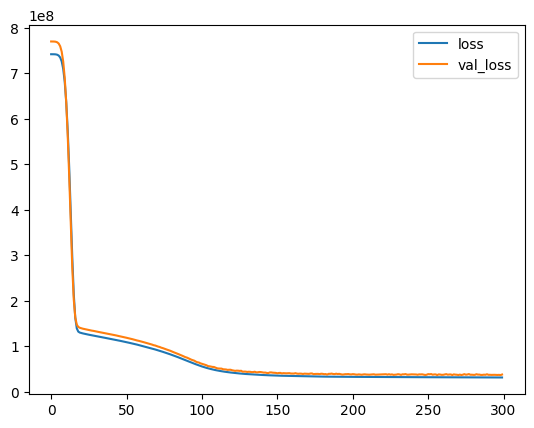

In [153]:
kayıp_veri.plot()

In [154]:
tahmin = model.predict(X_test)

123/123 [==============================] - 0s 2ms/step


In [155]:
mean_squared_error(y_test, tahmin)

37910579.71923471

In [156]:
mean_absolute_error(y_test, tahmin)

3732.0257983324004

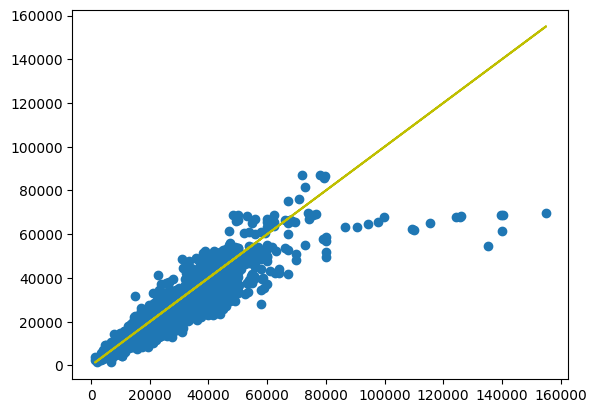

In [157]:
plt.scatter(y_test, tahmin)
plt.plot(y_test, y_test, "y-")